<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import packages</a></span></li><li><span><a href="#Read-Enm-pickle-object" data-toc-modified-id="Read-Enm-pickle-object-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Enm pickle object</a></span></li><li><span><a href="#Calculate-node-positions-with-spring-layout" data-toc-modified-id="Calculate-node-positions-with-spring-layout-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate node positions with spring layout</a></span></li><li><span><a href="#Network-plot" data-toc-modified-id="Network-plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Network plot</a></span><ul class="toc-item"><li><span><a href="#Figure-1B,-left" data-toc-modified-id="Figure-1B,-left-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Figure 1B, left</a></span></li><li><span><a href="#Figure-1B,-right" data-toc-modified-id="Figure-1B,-right-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Figure 1B, right</a></span></li></ul></li><li><span><a href="#Figure-1C" data-toc-modified-id="Figure-1C-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Figure 1C</a></span></li><li><span><a href="#Figure-1D" data-toc-modified-id="Figure-1D-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Figure 1D</a></span></li></ul></div>

# Import packages

In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib.lines import Line2D
import qgrid
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from enm.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from enm.Enm import Enm
from enm.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
os.chdir('../')

# Read Enm pickle object

In [5]:
with open(f'data/interim/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)



# Calculate node positions with spring layout

**This could be different from the ones shown in paper due to random node position calculation**

This does not change any claims in the paper

In [6]:
e_pcc.spring_pos()

In [7]:
pos = e_pcc.graph_gc.nodes('pos')

# Network plot
## Figure 1B, left

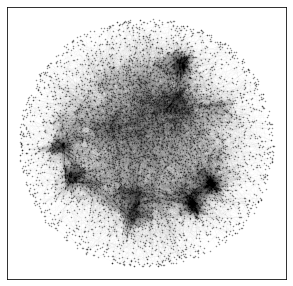

In [8]:
fig, ax =plt.subplots()

nx.draw_networkx_nodes(e_pcc.graph_gc,
                           node_size=0.2,
                           alpha=0.5,
                           node_color='k',
                           pos=pos,
                         ax=ax
                           # node_shape=matplotlib.markers.MarkerStyle(marker='o',fillstyle='full')
                           )
nx.draw_networkx_edges(e_pcc.graph_gc,
                           alpha= 0.1,
                           width= 0.1,
                           edge_color='k',
                           pos=pos,
                           label='PCC>0.2',ax=ax)


## Figure 1B, right

/home/oma21/enm_package/enm/visualize.py:334: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_heatmap.set_xticklabels(idx1_cl, minor=False)
/home/oma21/enm_package/enm/visualize.py:342: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_heatmap.set_yticklabels(idx2_cl, minor=False)


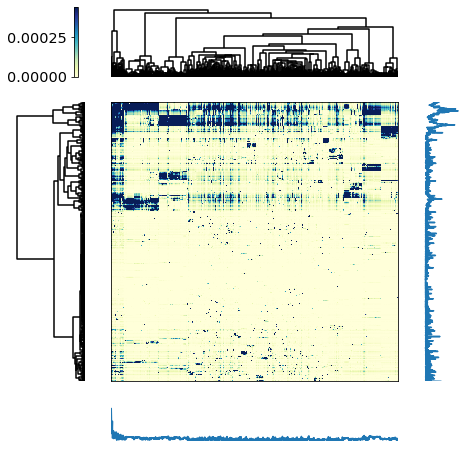

(array([0.00225456, 0.00212964, 0.00064455, ..., 0.0018722 , 0.00188671,
        0.00196717]),
 array([0.00670243, 0.00670243, 0.00610539, ..., 0.00030683, 0.00022774,
        0.00013241]))

In [9]:
e_pcc.heatmap_annotated()

# Figure 1C

`get_clustered_nodes` finds the gene names belonging the outmost, smaller cluster for rows and columns as shown.

In [10]:
cc = e_pcc.df.iloc[e_pcc.get_clustered_nodes('column'),:]
rc = e_pcc.df.iloc[e_pcc.get_clustered_nodes('row'),:]

In [11]:
#rc: row cluster
#cc: column cluster

In [12]:
df = e_pcc.df
df['cc'] = ['cc' if i in cc.orf_name.tolist() else 'other' for i in df.orf_name.tolist()]
df['rc'] = ['rc' if i in rc.orf_name.tolist() else 'other' for i in df.orf_name.tolist()]

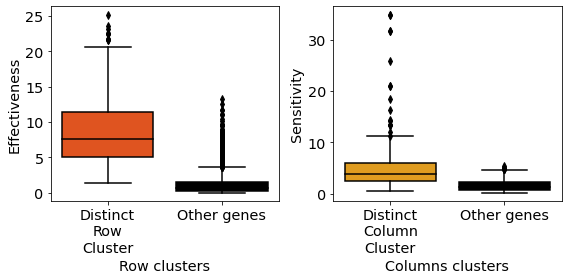

In [16]:
import seaborn as sns
color = {'cc': 'orange','other':'k','rc':'orangered'}
fig, ax = plt.subplots(1,2,figsize=(8,4))

sns.boxplot(data=df, x='rc',y='eff',order=['rc','other'],palette=color,ax=ax[0])
ax[0].set_xticklabels(['Distinct\nRow\nCluster', 'Other genes'])
ax[0].set_xlabel('Row clusters')
ax[0].set_ylabel('Effectiveness')

sns.boxplot(data=df, x='cc',y='sens',order=['cc','other'],palette=color,ax=ax[1])
ax[1].set_xticklabels(['Distinct\nColumn\nCluster', 'Other genes'])
ax[1].set_xlabel('Columns clusters')
ax[1].set_ylabel('Sensitivity')

plt.tight_layout()

#plt.savefig('reports/figures/network_images_040221/colcluster_sens.png')

# Figure 1D

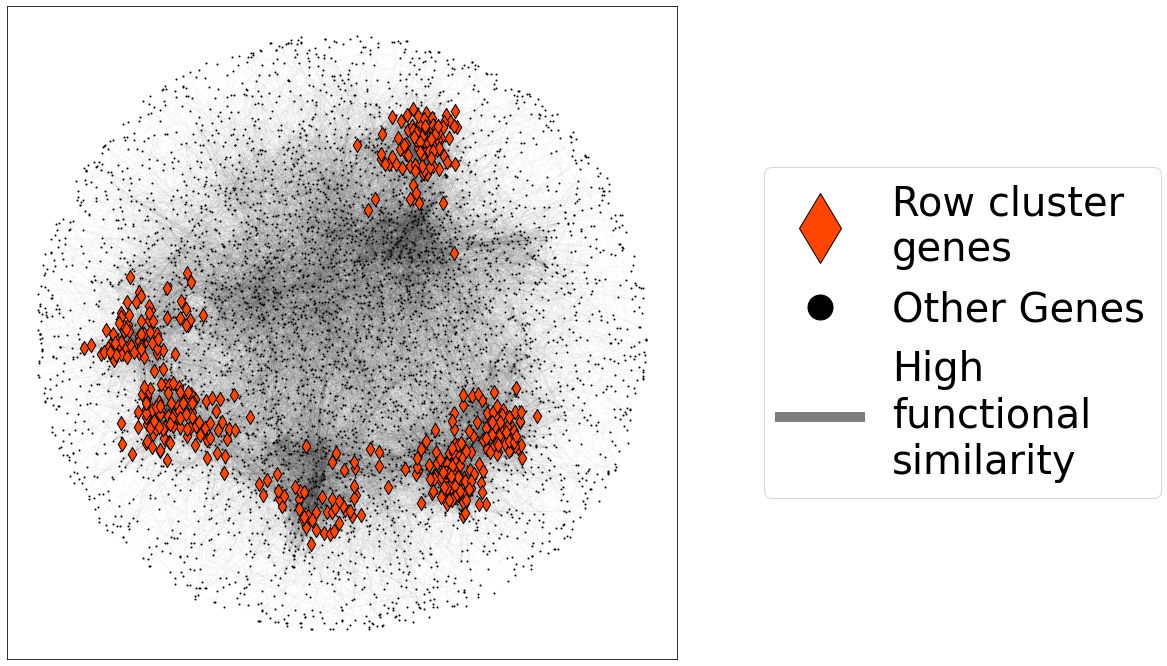

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
nx.draw_networkx_nodes(e_pcc.graph_gc, ax =ax , pos=pos,node_size=1, node_color='black')
nx.draw_networkx_edges(e_pcc.graph_gc, ax =ax , pos=pos,node_size=1, edge_color='black',alpha=0.2, width=0.1)
nx.draw_networkx_nodes(e_pcc.graph_gc, 
                       nodelist=rc.orf_name.tolist(),
                       ax=ax, 
                       pos=pos,
                       node_color='orangered',
                      edgecolors='black',
                      node_size=100,
                      node_shape='d')

ax.set_facecolor('white')
legend_elements.extend(
    [Line2D([0], [0], marker='d', color='black', label='Row cluster\ngenes',
                              markerfacecolor='orangered', markersize=50, linestyle="None"),
     Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=25, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High\nfunctional\nsimilarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5,lw=10)
    ]
)
lgd = ax.legend(handles=legend_elements, fontsize=40,loc='center left', bbox_to_anchor=(1.1, 0.5))


#nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, effector_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='blue',alpha=0.5)
#plt.savefig('reports/figures/network_images_040221/rowcluster_nw_map.png',bbox_inches='tight')

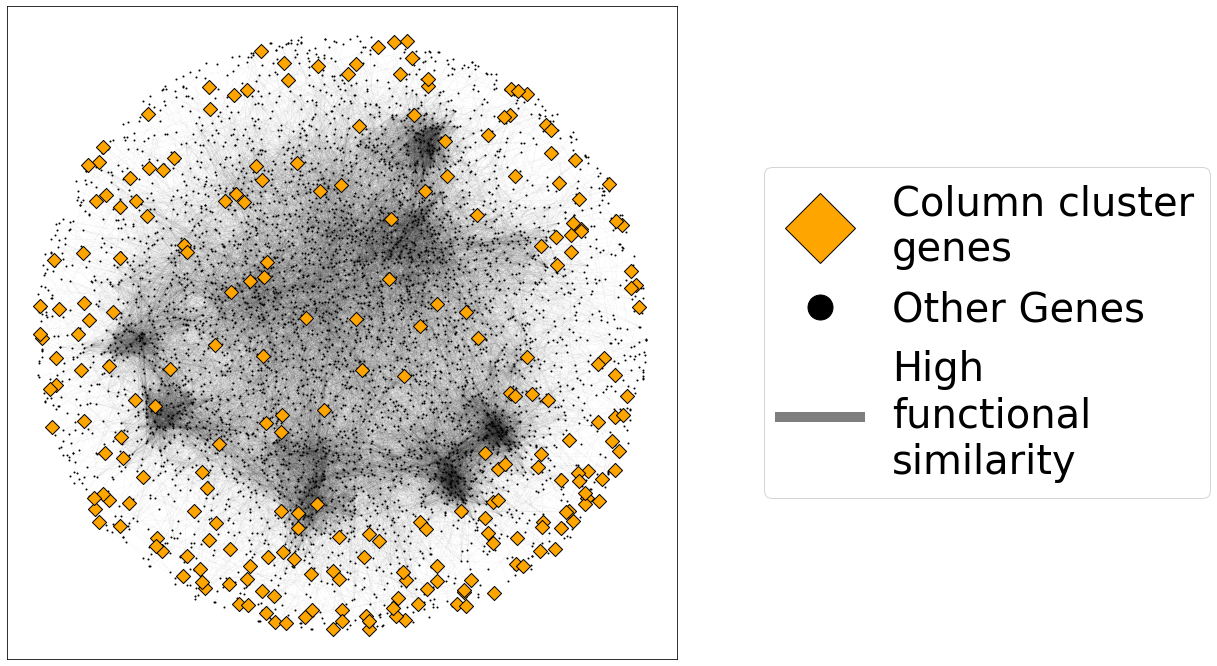

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
nx.draw_networkx_nodes(e_pcc.graph_gc, ax =ax , pos=pos,node_size=1, node_color='black')
nx.draw_networkx_edges(e_pcc.graph_gc, ax =ax , pos=pos,node_size=1, edge_color='black',alpha=0.2, width=0.1)
nx.draw_networkx_nodes(e_pcc.graph_gc, 
                       nodelist=cc.orf_name.tolist(),
                       ax=ax, 
                       pos=pos,
                       node_color='orange',
                      edgecolors='black',
                      node_size=100,
                      node_shape='D')

ax.set_facecolor('white')
legend_elements.extend([
    Line2D([0], [0], marker='D', color='black', label='Column cluster\ngenes',
                              markerfacecolor='orange', markersize=50, linestyle="None"),
    Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=25, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High\nfunctional\nsimilarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5,lw=10),
    ]
)
lgd = ax.legend(handles=legend_elements, fontsize=40,loc='center left', bbox_to_anchor=(1.1, 0.5))


#nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, effector_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='blue',alpha=0.5)
#plt.savefig('reports/figures/network_images_040221/colcluster_nw_map.png',bbox_inches='tight')